In [97]:
import numpy as np
import matplotlib.pyplot as plt

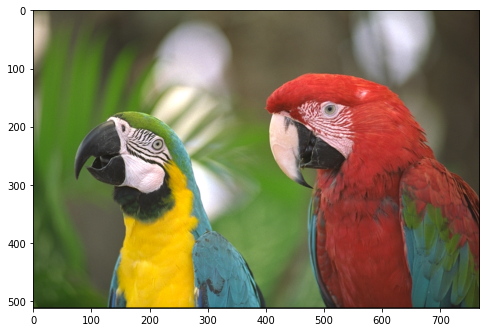

In [98]:
plt.figure(figsize=(8,10))
Img = (plt.imread('/content/drive/MyDrive/Deep Learning/week13/kodim23.png')*255).astype('uint8')
plt.imshow(Img)


In [99]:
def rgb2cfa(img, pattern='rggb'):

  R = img[:,:,0]
  G = img[:,:,1]
  B = img[:,:,2]

  H = img.shape[0]
  W = img.shape[1]

  listP = list(pattern)
  rggbList=[]
  for i in range(W):
    subList=[]
    for j in range(H):
      subList.append(listP[ (i % 2)*2 + (j % 2)])
    rggbList.append(subList)

  rggbArray = np.array(rggbList)
  cfaImg = np.zeros(img.shape[0:2])


  for i in range(H):
    for j in range(W):
      if rggbArray[j,i]=='r':
        cfaImg[i,j]=R[i,j]
      if rggbArray[j,i]=='g':
        cfaImg[i,j]=G[i,j]
      if rggbArray[j,i]=='b':
        cfaImg[i,j]=B[i,j]

  return cfaImg

def demosaic(CFA, pattern='rggb'):
  
  H = CFA.shape[0]
  W = CFA.shape[1]
  recover = np.zeros((H,W,3))

  for i in range(0,H-1,2):
    for j in range(0,W-1,2):
      
      R=CFA[i,j]
      G1=CFA[i,j+1]
      G2=CFA[i+1,j]
      B=CFA[i+1,j+1]

      for k1 in range(2):
        for k2 in range(2):
          recover[i+k1,j+k2,0]=R
          recover[i+k1,j+k2,1]=(G1+G2)//2
          recover[i+k1,j+k2,2]=B

  return recover.astype('uint8')

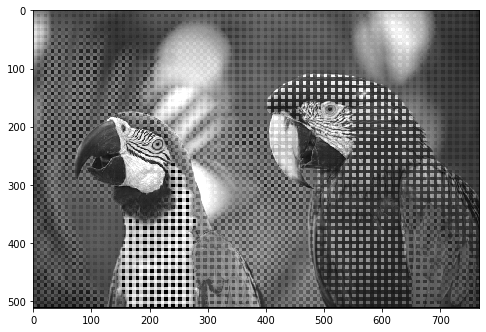

In [100]:
CFA = rgb2cfa(Img)
plt.figure(figsize=(8,10))
plt.imshow(CFA,cmap='gray',interpolation='none')

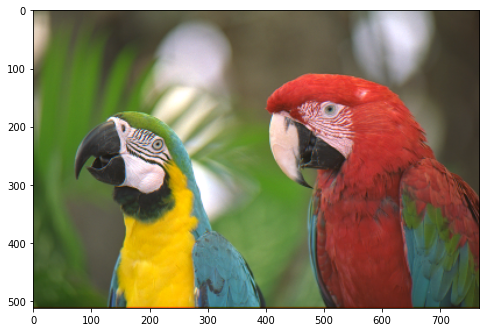

In [102]:
recoverImg=demosaic(CFA)
plt.figure(figsize=(8,10))
plt.imshow(recoverImg)